In [ ]:
import pandas as pd
import os


# Get the current working directory (not using __file__)
base_dir = os.getcwd()


csv_path = os.path.join(base_dir, 'Telco-Customer-Churn.csv')

# Load the Excel file
df = pd.read_csv(csv_path)
df = df.drop(columns=['customerID'])
# Replace "No phone service" and "No internet service" across all columns
df.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)


# Convert 'TotalCharges' to numeric, coercing any errors (non-numeric values) to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#TotalCharges - Handle missing values by filling them with 0
# to apply SMOTE without issues
df['TotalCharges'] = df['TotalCharges'].fillna(0)

#one hot encoding for categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())
df = df_encoded

In [24]:
#Explatory Data Analysis

# Basic information about the dataset
print('----------------------- EDA Section -------------------------------\n'
      '\n             Basic Information about the Dataset\n\n'
      '----------------------------------------------------------------------\n')


print(df.info())

# Summary statistics for numerical columns
print(df.describe())


#Part B: Check class distribution
# Count the unique values in the target column (replace 'Churn' with your actual target column)
print(df['Churn_Yes'].value_counts(normalize=True) * 100)  # Shows percentage of each class

#B1: Understand Customer Demographics and Features
# Analyze churn by gender, senior citizen status, partner, and dependents
print(df.groupby('gender_Male')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('SeniorCitizen')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('Partner_Yes')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('Dependents_Yes')['Churn_Yes'].value_counts(normalize=True))

#B2: Explore Customer Tenure
# Create tenure categories
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Get the count and relative frequency of Churn by TenureGroup
#tenure_churn_counts = df.groupby('TenureGroup')['Churn_Yes'].value_counts()
#tenure_churn_percentage = df.groupby('TenureGroup')['Churn_Yes'].value_counts(normalize=True)

tenure_churn_counts = df.groupby('TenureGroup', observed=False)['Churn_Yes'].value_counts()
tenure_churn_percentage = df.groupby('TenureGroup', observed=False)['Churn_Yes'].value_counts(normalize=True)


# Display counts and percentages
print("Count of Churn by Tenure Group:\n", tenure_churn_counts)
print("\nPercentage of Churn by Tenure Group:\n", tenure_churn_percentage)

#B3: Analyze Service Usage
print(df.groupby('InternetService_Fiber optic')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('InternetService_No')['Churn_Yes'].value_counts(normalize=True))


#B4: Analyze Contract and Payment Method
# Churn analysis by contract type
print(df.groupby('Contract_One year')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('Contract_Two year')['Churn_Yes'].value_counts(normalize=True))

# Churn analysis by payment method
print(df.groupby('PaymentMethod_Credit card (automatic)')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('PaymentMethod_Electronic check')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('PaymentMethod_Mailed check')['Churn_Yes'].value_counts(normalize=True))

#C- Separate features and target
X = df.drop(columns=['Churn_Yes'])
X_encoded = pd.get_dummies(X, drop_first=True)
y = df['Churn_Yes']

print("Original class distribution:\n", y.value_counts())

----------------------- EDA Section -------------------------------

             Basic Information about the Dataset

----------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   SeniorCitizen                          7043 non-null   int64   
 1   tenure                                 7043 non-null   int64   
 2   MonthlyCharges                         7043 non-null   float64 
 3   TotalCharges                           7043 non-null   float64 
 4   gender_Male                            7043 non-null   bool    
 5   Partner_Yes                            7043 non-null   bool    
 6   Dependents_Yes                         7043 non-null   bool    
 7   PhoneService_Yes                       7043 non-null   bool    
 8   Multipl

----------------------- EDA Section -------------------------------

             Graphs about the Dataset

----------------------------------------------------------------------



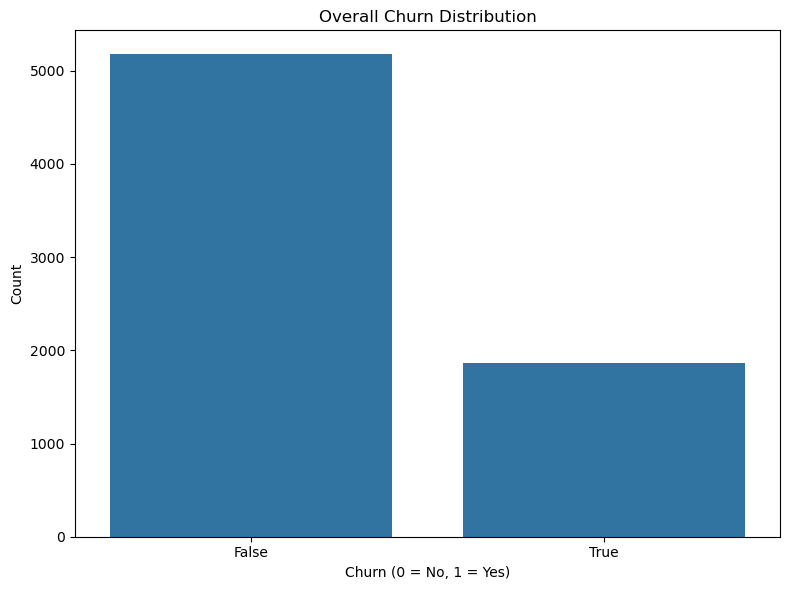

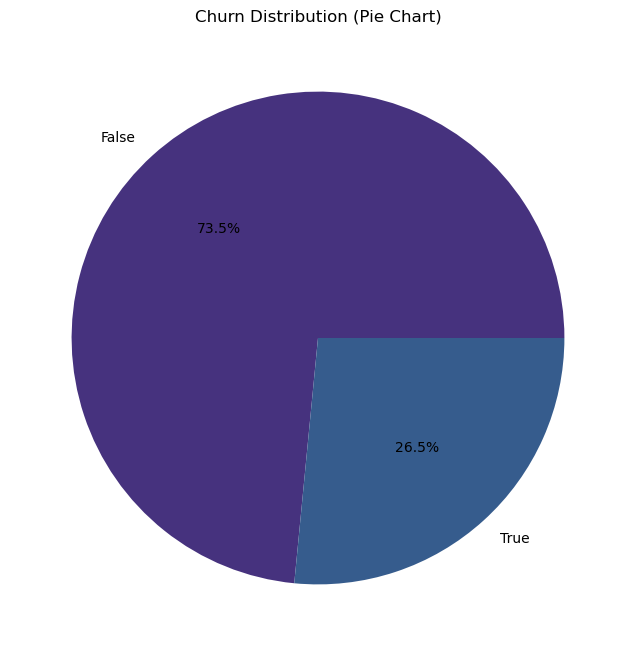

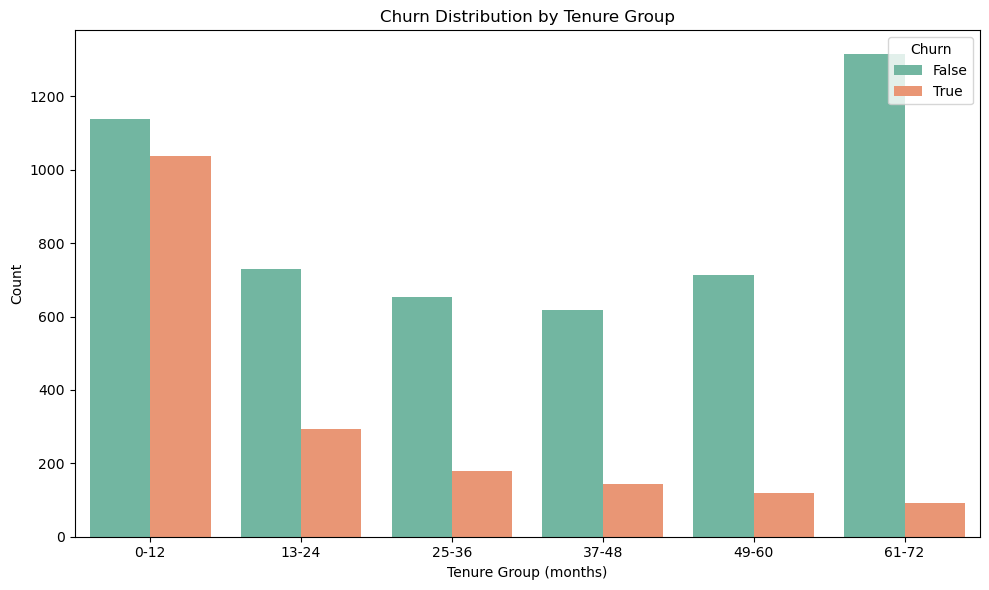

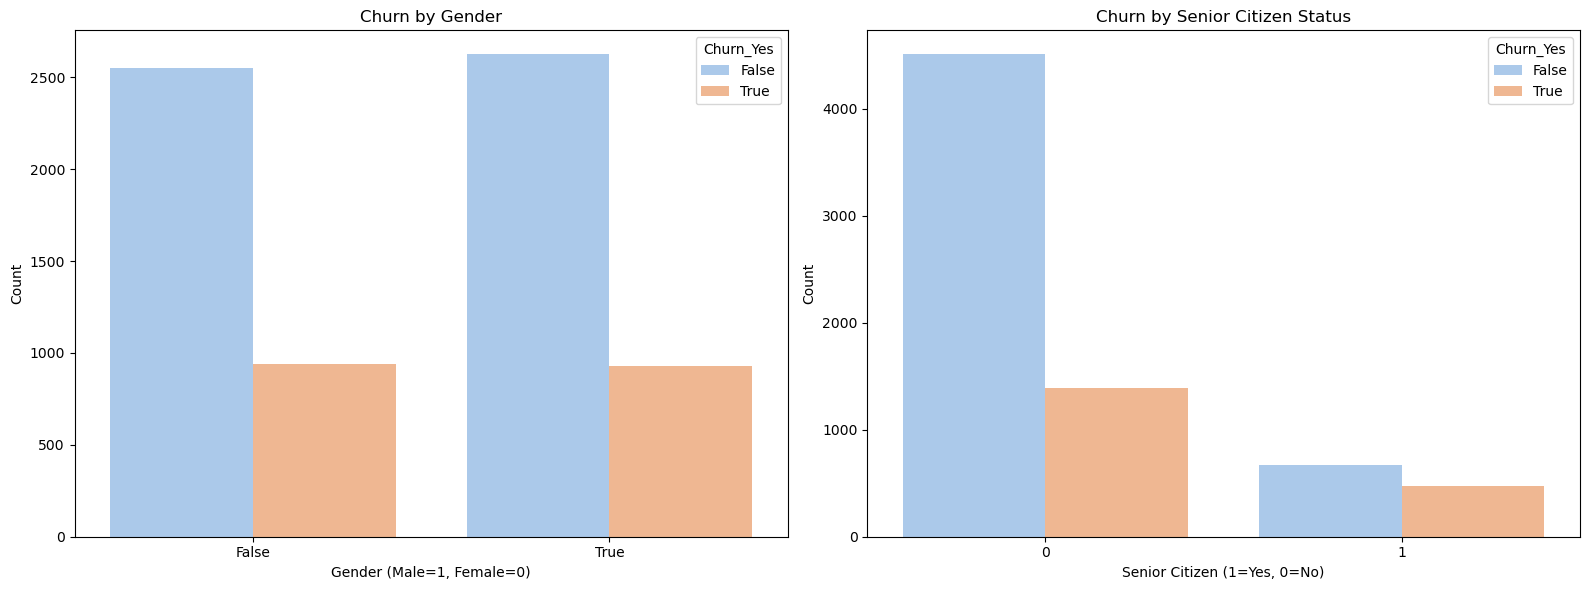

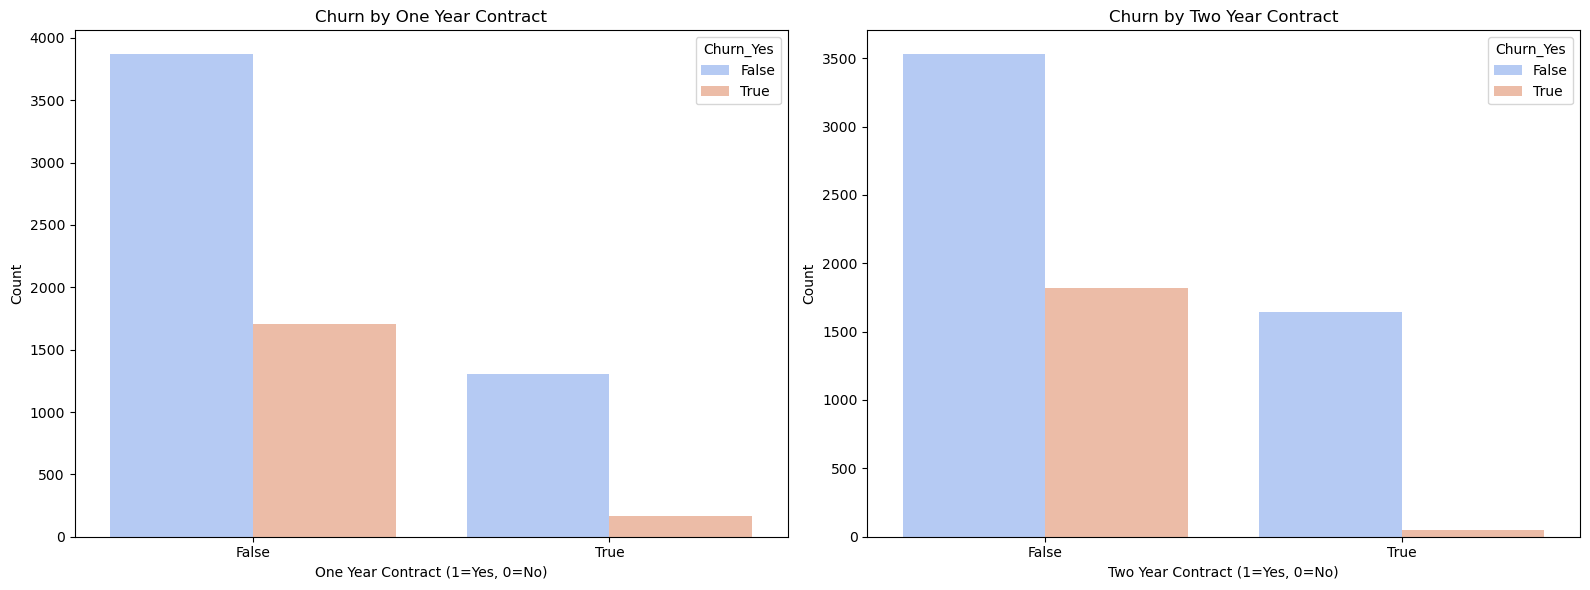

In [26]:
#Explatory Data Analysis- Graphs

# Basic information about the dataset
print('----------------------- EDA Section -------------------------------\n'
      '\n             Graphs about the Dataset\n\n'
      '----------------------------------------------------------------------\n')

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Overall Churn Distribution
# Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn_Yes')
plt.title("Overall Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Pie Chart
churn_counts = df['Churn_Yes'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title("Churn Distribution (Pie Chart)")
plt.show()

# 2. Churn by Tenure Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TenureGroup', hue='Churn_Yes', palette='Set2')
plt.title("Churn Distribution by Tenure Group")
plt.xlabel("Tenure Group (months)")
plt.ylabel("Count")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()

# 3. Churn by Demographics: Gender and Senior Citizen Status
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df, x='gender_Male', hue='Churn_Yes', palette='pastel', ax=axes[0])
axes[0].set_title("Churn by Gender")
axes[0].set_xlabel("Gender (Male=1, Female=0)")
axes[0].set_ylabel("Count")

sns.countplot(data=df, x='SeniorCitizen', hue='Churn_Yes', palette='pastel', ax=axes[1])
axes[1].set_title("Churn by Senior Citizen Status")
axes[1].set_xlabel("Senior Citizen (1=Yes, 0=No)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# 4. Churn by Contract Type
# Assuming you have binary columns 'Contract_One year' and 'Contract_Two year'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df, x='Contract_One year', hue='Churn_Yes', palette='coolwarm', ax=axes[0])
axes[0].set_title("Churn by One Year Contract")
axes[0].set_xlabel("One Year Contract (1=Yes, 0=No)")
axes[0].set_ylabel("Count")

sns.countplot(data=df, x='Contract_Two year', hue='Churn_Yes', palette='coolwarm', ax=axes[1])
axes[1].set_title("Churn by Two Year Contract")
axes[1].set_xlabel("Two Year Contract (1=Yes, 0=No)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()



In [28]:

print('\n\n\n---------------------------------------- Dataset Balancing ---------------------------------------\n'
      '\n                       Techniques such as: oversampling, undersampling, or SMOTE '
      '\n                   Cost Sensitive Learning to assign different wieghts to Random Forest \n'
      '-----------------------------------------------------------------------------------------------------\n')

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['TenureGroup'] = le.fit_transform(X['TenureGroup'])

# Oversampling
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
print("\nOversampled class distribution:\n", y_over.value_counts())

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print("\nUndersampled class distribution:\n", y_under.value_counts())

#SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the resampled class distribution
print("\nResampled class distribution using SMOTE:\n", y_smote.value_counts())




---------------------------------------- Dataset Balancing ---------------------------------------

                       Techniques such as: oversampling, undersampling, or SMOTE 
                   Cost Sensitive Learning to assign different wieghts to Random Forest 
-----------------------------------------------------------------------------------------------------


Oversampled class distribution:
 Churn_Yes
False    5174
True     5174
Name: count, dtype: int64

Undersampled class distribution:
 Churn_Yes
False    1869
True     1869
Name: count, dtype: int64

Resampled class distribution using SMOTE:
 Churn_Yes
False    5174
True     5174
Name: count, dtype: int64


In [29]:
print(
      '\n' + '=' * 80 +
      '\n' + "MODEL TRAINING & COMPARISON ".center(80) +
      '\n' + '=' * 80 +
      '\n\nTrain Random Forest Classifier on a balanced dataset.\n' +
      'Training is occurring in the background...\n' +
      '=' * 80 + '\n'
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest classifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Step 3: Train Support Vector Classifier
svc_clf = SVC(class_weight='balanced', random_state=42)
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

# Step 4: Train k-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


                          MODEL TRAINING & COMPARISON                           

Train Random Forest Classifier on a balanced dataset.
Training is occurring in the background...



In [30]:
print(
      '\n' + '=' * 80 +
      '\n' + "MODEL TRAINING & COMPARISON".center(80) +
      '\n' + '=' * 80 +
      '\n\nUse cross-validation and metrics to compare performance between models.\n' +
      '=' * 80 + '\n'
)

# Metric Definitions
print("\nMetric Definitions:\n"
      "1. Accuracy: The percentage of correctly classified instances out of all instances.\n"
      "2. Precision: The percentage of true positive predictions out of all positive predictions.\n"
      "3. Recall: The percentage of true positive cases correctly identified out of all actual positive cases.\n"
      "4. F1 Score: Considers precision and recall, balancing both metrics.\n")

# Step 1: Evaluate all models
models = {
      "Random Forest": y_pred_rf,
      "Support Vector Classifier": y_pred_svc,
      "k-Nearest Neighbors": y_pred_knn
}

for model_name, y_pred in models.items():
      print(f"\n{model_name} Performance:")
      print("Accuracy:", accuracy_score(y_test, y_pred))
      print("Precision:", precision_score(y_test, y_pred))
      print("Recall:", recall_score(y_test, y_pred))
      print("F1 Score:", f1_score(y_test, y_pred))


# Step 2: Create a DataFrame to store model performance metrics
metrics_list = []
# Iterate over each model and its predictions
for model_name, y_pred in models.items():
      model_metrics = {
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred)
      }
      metrics_list.append(model_metrics)

metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.set_index("Model").T

print("\nModel Performance Evaluation:\n")
print(metrics_df)


#cross validation s
from sklearn.model_selection import cross_val_score

#  for Random Forest
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_cv_scores = cross_val_score(rf_clf, X_smote, y_smote, cv=10, scoring='accuracy')  # 10-fold cross-validation
print(f"Random Forest Cross-validation Accuracy: {rf_cv_scores.mean()}")


                          MODEL TRAINING & COMPARISON                           

Use cross-validation and metrics to compare performance between models.


Metric Definitions:
1. Accuracy: The percentage of correctly classified instances out of all instances.
2. Precision: The percentage of true positive predictions out of all positive predictions.
3. Recall: The percentage of true positive cases correctly identified out of all actual positive cases.
4. F1 Score: Considers precision and recall, balancing both metrics.


Random Forest Performance:
Accuracy: 0.855072463768116
Precision: 0.855650522317189
Recall: 0.8589132507149666
F1 Score: 0.857278782112274

Support Vector Classifier Performance:
Accuracy: 0.6700483091787439
Precision: 0.6898340248962656
Recall: 0.6339370829361296
F1 Score: 0.6607054148037754

k-Nearest Neighbors Performance:
Accuracy: 0.77487922705314
Precision: 0.7493584260051326
Recall: 0.8350810295519543
F1 Score: 0.7899008115419297

Model Performance Evaluation:




                                  OTHER NOTES                                   

This section contains additional notes and observations to derive further insights.



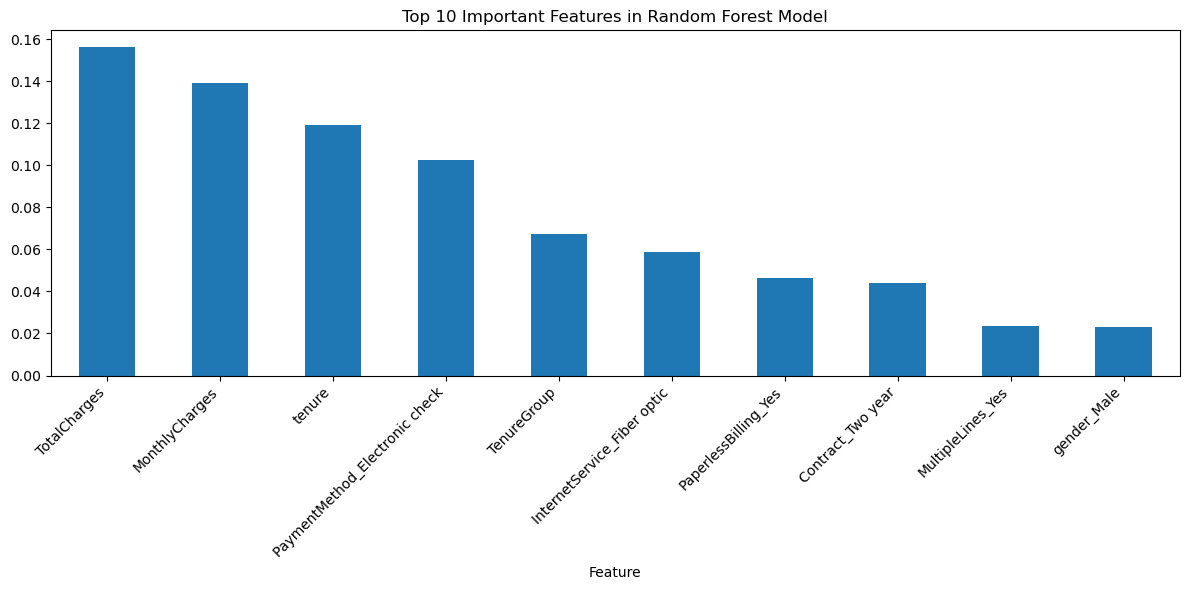

                           Feature  Importance
3                     TotalCharges    0.156347
2                   MonthlyCharges    0.139000
1                           tenure    0.118969
21  PaymentMethod_Electronic check    0.102718
23                     TenureGroup    0.067078
9      InternetService_Fiber optic    0.058913
19            PaperlessBilling_Yes    0.046318
18               Contract_Two year    0.043801
8                MultipleLines_Yes    0.023350
4                      gender_Male    0.023111
Processed DataFrame has been saved to: C:\Users\ddele\anaconda_projects\Processed-Telco-Customer-Churn.csv


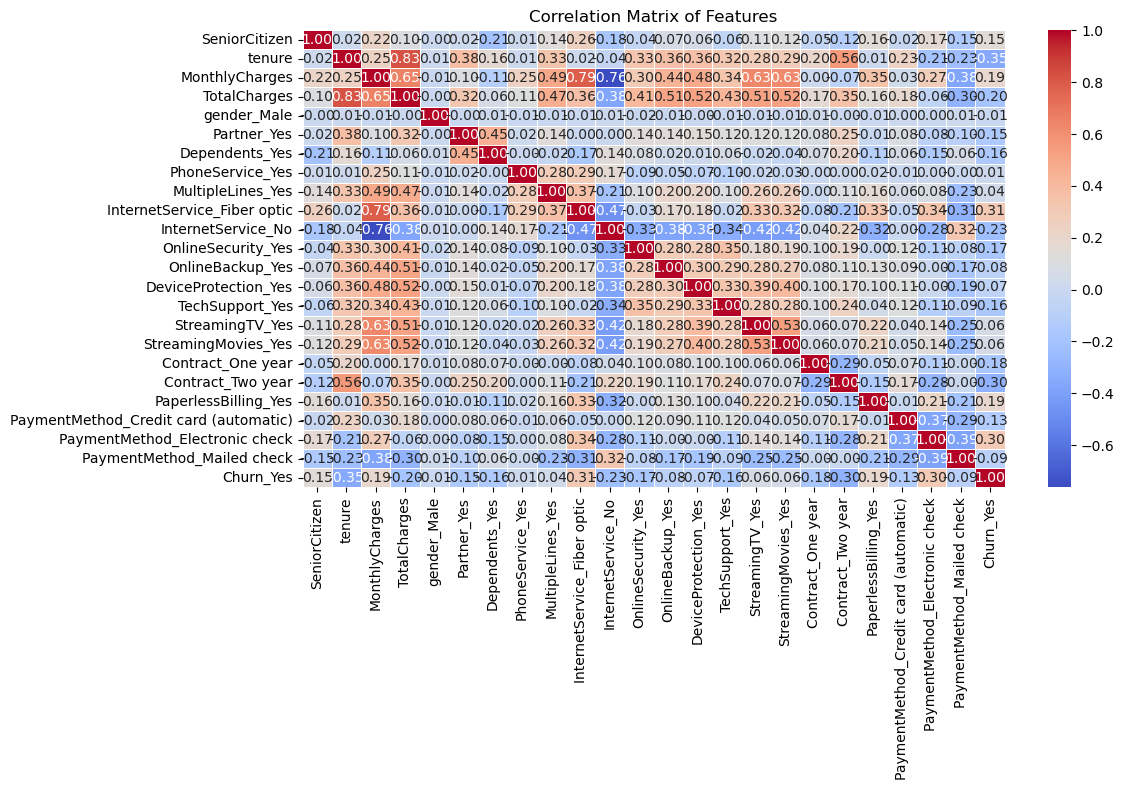

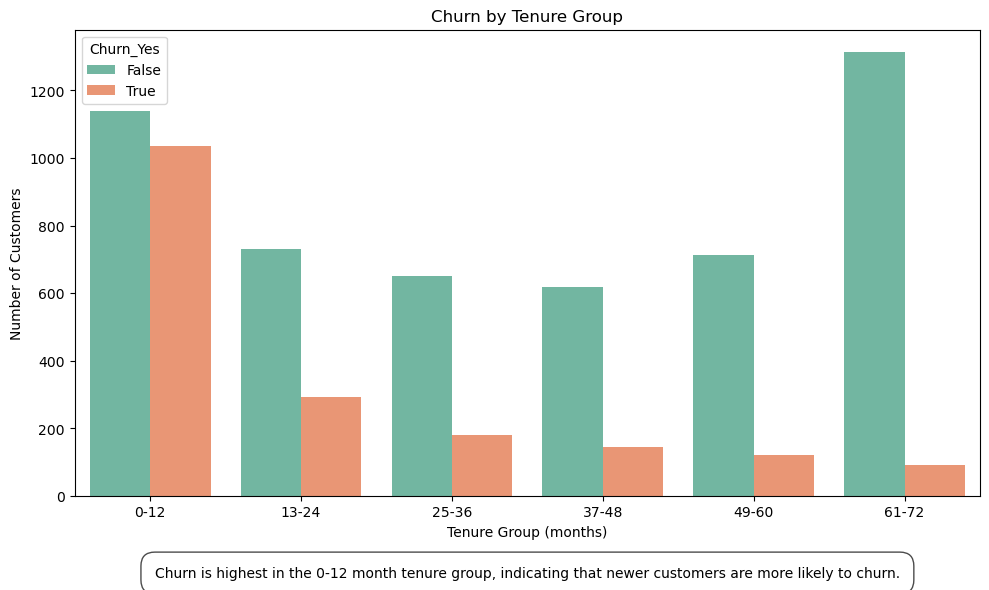

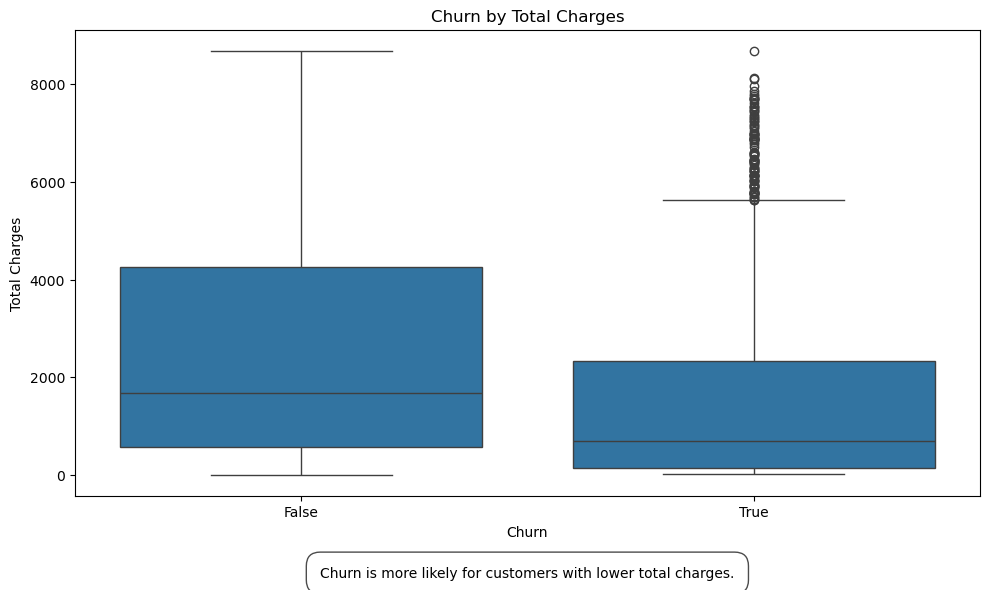

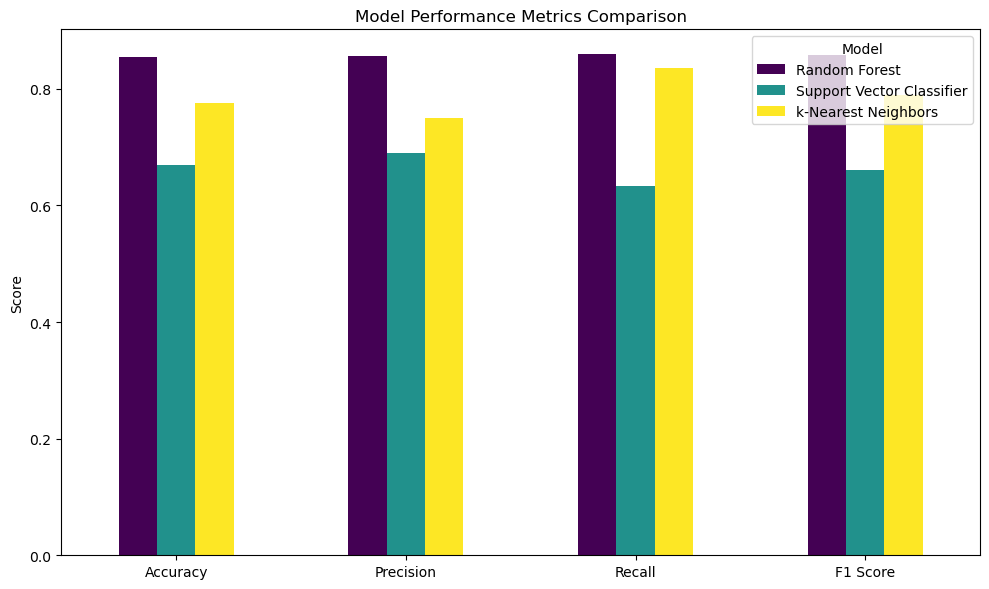

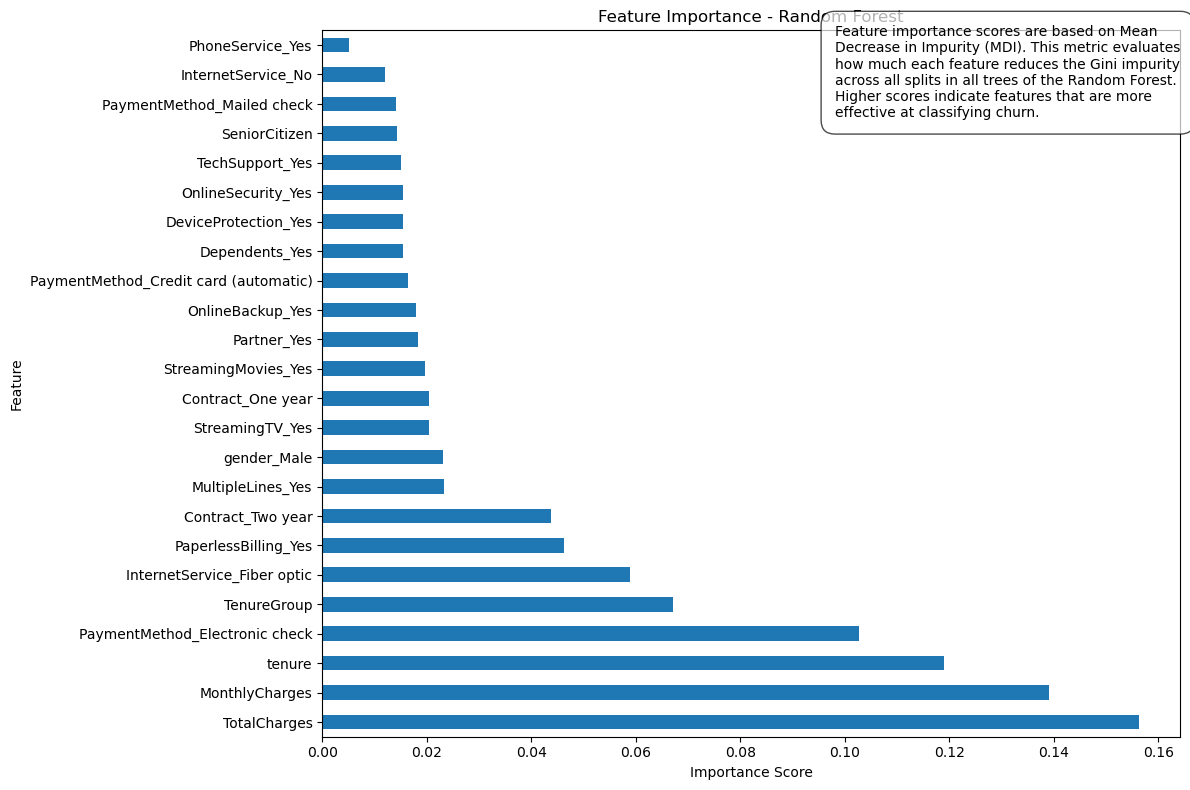

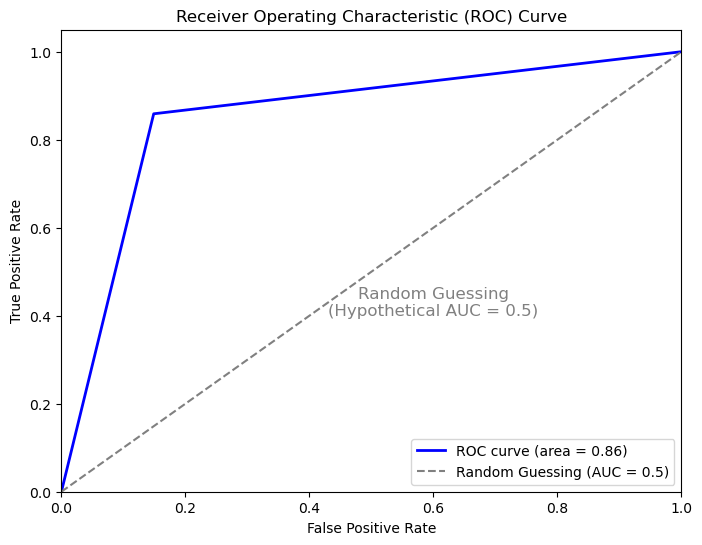

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


print(
      '\n' + '=' * 80 +
      '\n' + "OTHER NOTES".center(80) +
      '\n' + '=' * 80 +
      '\n\nThis section contains additional notes and observations to derive further insights.\n' +
      '=' * 80 + '\n'
)

###### this section is for useful overall common graphs

#w1 Examples on feature importance
# Get feature importances from the trained Random Forest model
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf.fit(X_smote, y_smote)
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns  # List of feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plot the top 10 most important features with a larger figure size
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
importance_df.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False, ax=plt.gca())
plt.title('Top 10 Important Features in Random Forest Model')

# Rotate the x-axis labels for clarity
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Print the important features
print(importance_df.head(10))




# Export the last modified DataFrame to a CSV file- helps to track how the data was processed and cleaned
output_csv_path = os.path.join(base_dir, 'Processed-Telco-Customer-Churn.csv')
df.to_csv(output_csv_path, index=False)

print(f"Processed DataFrame has been saved to: {output_csv_path}")


#W2 Correlation Matrix
# Ensure numeric and boolean columns are considered for correlation
numeric_df = df.select_dtypes(include=[float, int, bool])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# heatmap plot
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


##############This section is for churn by different important features specific to each one#######

#x1 Churn by Tenure group
#  Explore Customer Tenure and create churn by tenure group plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TenureGroup', hue='Churn_Yes', palette='Set2')

note = "Churn is highest in the 0-12 month tenure group, indicating that newer customers are more likely to churn."
plt.text(x=0.5, y=-0.15, s=note, fontsize=10, ha='center', va='top', color='black',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=1'))

plt.title("Churn by Tenure Group")
plt.xlabel("Tenure Group (months)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()




#x2  Explore Customer Churn by TotalCharges and create plot
plt.figure(figsize=(10, 6))

# box plot to show the distribution of TotalCharges by Churn
sns.boxplot(data=df, x='Churn_Yes', y='TotalCharges')

note = "Churn is more likely for customers with lower total charges."
plt.text(x=0.5, y=-0.15, s=note, fontsize=10, ha='center', va='top', color='black',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=1'))

plt.title("Churn by Total Charges")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.tight_layout()
plt.show()


#x3 Bar Plot of Model Metrics: Visualize how the models compare in terms of accuracy, precision, recall, and F1-score using a bar plot
# Bar plot of model performance
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis', legend=True)
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#x4- Feature Importance in Random Forest
# Bar plot for all features
plt.figure(figsize=(12, 8))
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, ax=plt.gca())
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Add a note explaining feature importance
note = (
      "Feature importance scores are based on Mean Decrease in Impurity (MDI). "
      "This metric evaluates how much each feature reduces the Gini impurity "
      "across all splits in all trees of the Random Forest. Higher scores indicate "
      "features that are more effective at classifying churn."
)

# Add note at the top right of the figure, slightly closer to the center and down
plt.figtext(0.7, 0.85, note, ha='left', fontsize=10, wrap=True, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=1'))

# Adjust layout
plt.tight_layout()
plt.show()



#x5 Model Performance Plotting (ROC Curve / AUC)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Random Forest
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Adding a note for the random guessing line
plt.text(0.6, 0.4, 'Random Guessing\n(Hypothetical AUC = 0.5)', color='gray', fontsize=12, ha='center')

plt.legend(loc='lower right')
plt.show()

In [31]:
print(
      '\n' + '=' * 80 +
      '\n' + "IMPROVEMENTS".center(80) +
      '\n' + '=' * 80 +
      '\n\nThis section goes over different ways model could be improved.\n' +
      '=' * 80 + '\n'
)

#y1 Ensemble of Models (Stacking Classifier)
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Introduction: Explain the Stacking Classifier
print("""
The Stacking Classifier is an ensemble learning method that combines the predictions of multiple base 
models using a meta-model to improve performance by leveraging the strengths of various algorithms.

The following are the base learners (same ones that were compared)
- RandomForestClassifier
- Support Vector Classifier (SVC)
- K-Nearest Neighbors (KNN)

The meta-model, Logistic Regression, combines the base models' outputs, leveraging its simplicity 
to effectively weigh their contributions and help the ensemble prioritize models based on the data..

Next, the different steps involved in building, training, and evaluating this stacking (ensemble) classifier will be displayed:
""")

# Create the base models for the stacking classifier
print("Creating base models for the stacking classifier...")
base_learners = [
      ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
      ('svc', SVC(class_weight='balanced', random_state=42)),
      ('knn', KNeighborsClassifier())
]

# Create the meta-model
print("Creating meta-model (Logistic Regression)...")
meta_model = LogisticRegression()

# Stack the classifiers
print("Stacking the classifiers...")
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking classifier
print("Training the stacking classifier on the training data...")
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking classifier
print("Evaluating the stacking classifier on the test data...")
y_pred_stacking = stacking_clf.predict(X_test)

# Print performance metrics
print("Stacking Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking))
print("Recall:", recall_score(y_test, y_pred_stacking))
print("F1 Score:", f1_score(y_test, y_pred_stacking))


                                  IMPROVEMENTS                                  

This section goes over different ways model could be improved.


The Stacking Classifier is an ensemble learning method that combines the predictions of multiple base 
models using a meta-model to improve performance by leveraging the strengths of various algorithms.

The following are the base learners (same ones that were compared)
- RandomForestClassifier
- Support Vector Classifier (SVC)
- K-Nearest Neighbors (KNN)

The meta-model, Logistic Regression, combines the base models' outputs, leveraging its simplicity 
to effectively weigh their contributions and help the ensemble prioritize models based on the data..

Next, the different steps involved in building, training, and evaluating this stacking (ensemble) classifier will be displayed:

Creating base models for the stacking classifier...
Creating meta-model (Logistic Regression)...
Stacking the classifiers...
Training the stacking classifier on th